Dataset Shape: (891, 12)

Data Types:
 PassengerId      int64
Survived         int64
Pclass           int64
Name            object
Sex             object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Cabin           object
Embarked        object
dtype: object

Missing Values:
 PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64


/tmp/ipykernel_36/491629994.py:14: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Age'].fillna(df['Age'].median(), inplace=True)
/tmp/ipykernel_36/491629994.py:15: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try us

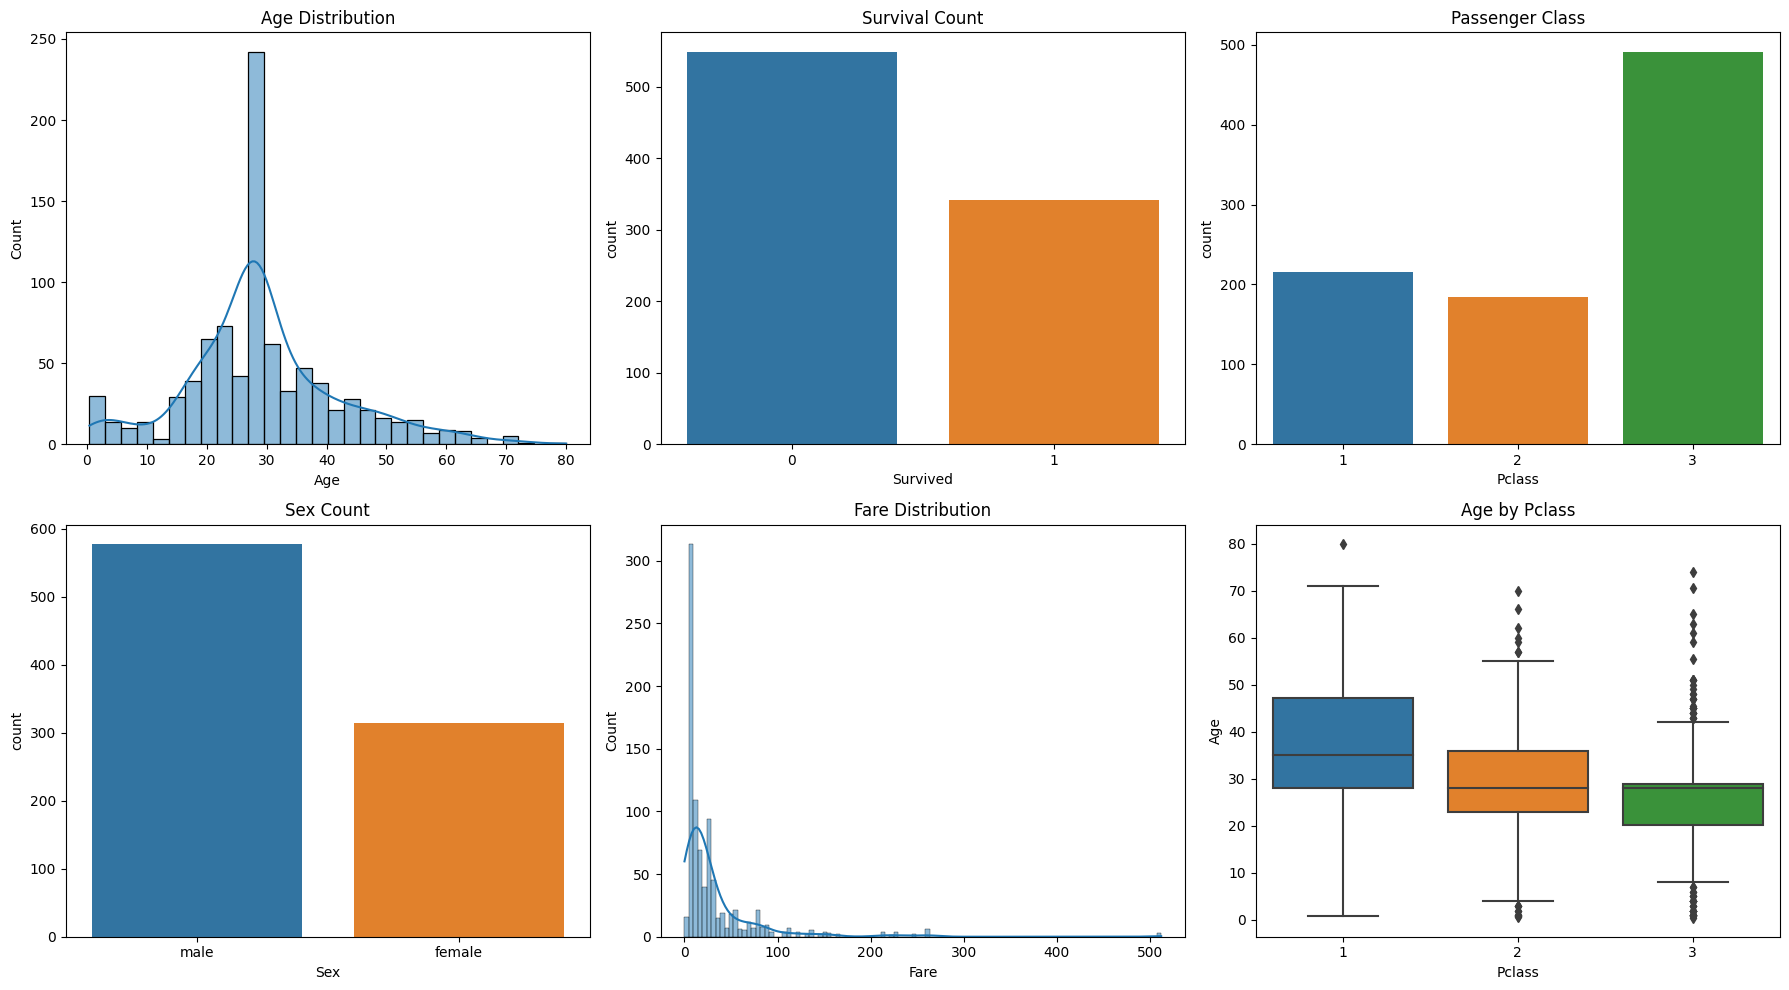

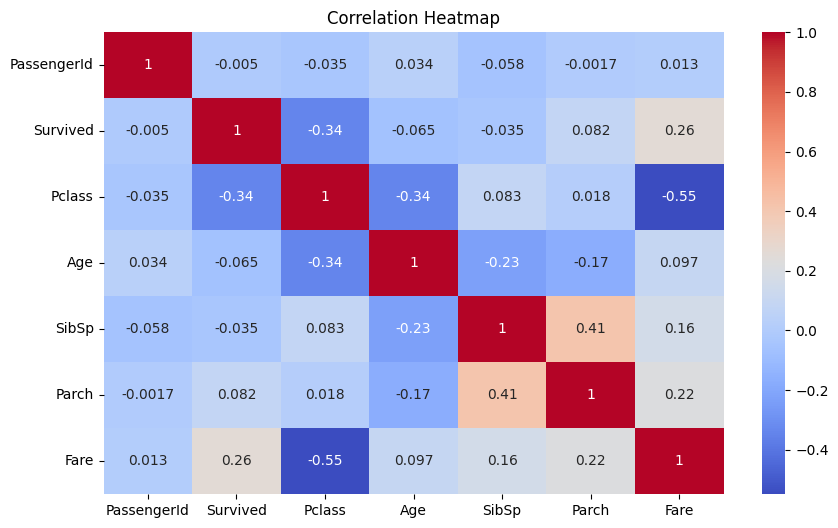

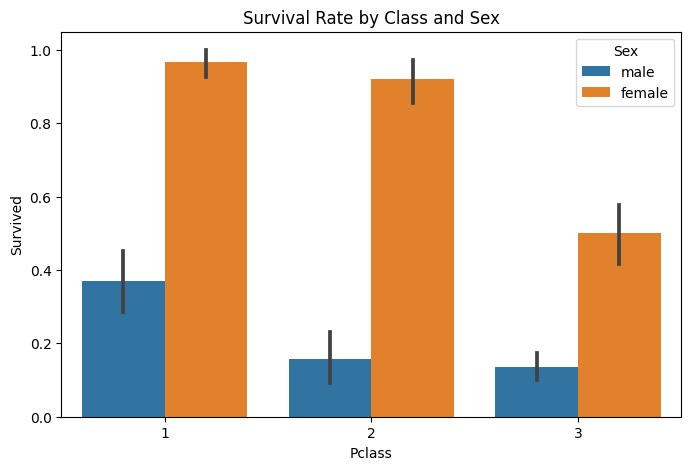

In [6]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load dataset (make sure file is in the same directory or give full path)
df = pd.read_csv("/kaggle/input/titanic-dataset/Titanic-Dataset.csv")  # Update path if needed

# Overview
print("Dataset Shape:", df.shape)
print("\nData Types:\n", df.dtypes)
print("\nMissing Values:\n", df.isnull().sum())

# Handle missing values
df['Age'].fillna(df['Age'].median(), inplace=True)
df['Embarked'].fillna(df['Embarked'].mode()[0], inplace=True)
df.drop(columns=['Cabin'], inplace=True)  # Too many missing values

# Univariate analysis
fig, axs = plt.subplots(2, 3, figsize=(18, 10))
sns.histplot(df['Age'], kde=True, ax=axs[0, 0]).set(title='Age Distribution')
sns.countplot(x='Survived', data=df, ax=axs[0, 1]).set(title='Survival Count')
sns.countplot(x='Pclass', data=df, ax=axs[0, 2]).set(title='Passenger Class')
sns.countplot(x='Sex', data=df, ax=axs[1, 0]).set(title='Sex Count')
sns.histplot(df['Fare'], kde=True, ax=axs[1, 1]).set(title='Fare Distribution')
sns.boxplot(x='Pclass', y='Age', data=df, ax=axs[1, 2]).set(title='Age by Pclass')
plt.tight_layout()
plt.show()

# Bivariate analysis
plt.figure(figsize=(10, 6))
sns.heatmap(df.corr(numeric_only=True), annot=True, cmap='coolwarm')
plt.title("Correlation Heatmap")
plt.show()

plt.figure(figsize=(8, 5))
sns.barplot(x='Pclass', y='Survived', hue='Sex', data=df)
plt.title("Survival Rate by Class and Sex")
plt.show()



# Summary of Insights
## print("\n🔍 Summary of Key Insights:")
## print("- Most passengers were in 3rd class and male.")
## print("- Survival rate was higher for females and 1st class passengers.")
## print("- Age and fare distributions are right-skewed.")
## print("- Strong correlation between Pclass and Fare (higher class → higher fare).")
## print("- Missing Age values were filled with median; Cabin column dropped.")
